In [1]:
### importing main libraries 

In [6]:
import  pandas as pd 
import numpy as np 
import os 
import cv2
import glob
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
###reading the data and labeling it 

In [8]:
size =128
all_images=[]
all_labels=[]
for directory_path in glob.glob(r'D:\aiNTI\Data\potatoo\*'):
    label=directory_path.split('//')[-1]
    print (label)
    for img_path in glob.glob(os.path.join(directory_path,'*.JPG')):
        img=cv2.imread(img_path,0)
        img=cv2.resize(img,(size,size))
        all_images.append(img)
        all_labels.append(label)
    print('image_loaded')
#forming the list into array 
all_images=np.array(all_images)
all_labels=np.array(all_labels)
#writing the total number of images 
print('total_image=',len(all_images))

D:\aiNTI\Data\potatoo\001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
image_loaded
D:\aiNTI\Data\potatoo\002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
image_loaded
D:\aiNTI\Data\potatoo\0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
image_loaded
D:\aiNTI\Data\potatoo\00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG
image_loaded
D:\aiNTI\Data\potatoo\006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG
image_loaded
D:\aiNTI\Data\potatoo\0085ef03-aec3-431a-99a1-de286e10c0cf___RS_LB 2949.JPG
image_loaded
D:\aiNTI\Data\potatoo\009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG
image_loaded
D:\aiNTI\Data\potatoo\00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG
image_loaded
D:\aiNTI\Data\potatoo\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG
image_loaded
D:\aiNTI\Data\potatoo\00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
image_loaded
D:\aiNTI\Data\potatoo\0114b195-844c-4978-93a9-b0d5aae010f1___RS_LB 2738.JPG
image_loaded
D

In [ ]:
#spliting the data into traing and testing 
x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=.2, random_state= 45, shuffle=True)

In [6]:
###encoding the image labels into numbers to be brocessed by the model 

In [7]:
lb = LabelEncoder()
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded = lb.fit_transform(y_test)

In [8]:
#creating DataFrame
def GLCM (dataset):
    image_feature = pd.DataFrame()
    
    for image in range(dataset.shape[0]):
        df = pd.DataFrame()
        img = dataset[image, :,:]
        distance = [1,2,5]
        angles = [0, np.pi, np.pi/2]
        for i in range (len(distance)):
            for j in range (len(angles)):
                GLCM = graycomatrix(img, [distance[i]], [angles[j]])
                GLCM_energy = graycoprops(GLCM, 'energy')[0]
                df['energy'] = GLCM_energy
                GLCM_corr = graycoprops(GLCM, 'correlation')[0]
                df['corr'] = GLCM_corr
                GLCM_dissimmilarity = graycoprops(GLCM, 'dissimilarity')[0]
                df['diss_sim'] = GLCM_dissimmilarity
                GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
                df['homogen'] = GLCM_hom

        image_feature = image_feature.append(df)
    return image_feature

In [9]:
train_reatures = GLCM(x_train)

In [10]:

print('ok')
#creating Decision Tree model 
dt = DecisionTreeClassifier()
dt.fit(train_reatures, y_train_encoded)
test_features = GLCM(x_test)
test_dt = np.reshape(test_features, (x_test.shape[0],-1))
predicted=dt.predict(test_features)
# from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y_test_encoded))
print(confusion_matrix( predicted,y_test_encoded))
print(classification_report(predicted,y_test_encoded))
# dt.score(y_test_encoded, test_dt)

ok
0.7540603248259861
[[162  31   5]
 [ 30 158   9]
 [ 10  21   5]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       198
           1       0.75      0.80      0.78       197
           2       0.26      0.14      0.18        36

    accuracy                           0.75       431
   macro avg       0.61      0.59      0.59       431
weighted avg       0.73      0.75      0.74       431



In [11]:
svc_model = SVC()
svc_model.fit(train_reatures, y_train_encoded)
predicted_svc=svc_model.predict(test_features)
print(accuracy_score(predicted_svc,y_test_encoded))
print(confusion_matrix( predicted_svc,y_test_encoded))
print(classification_report(predicted_svc,y_test_encoded))

0.8236658932714617
[[181  36   7]
 [ 21 174  12]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       224
           1       0.83      0.84      0.83       207
           2       0.00      0.00      0.00         0

    accuracy                           0.82       431
   macro avg       0.57      0.55      0.56       431
weighted avg       0.86      0.82      0.84       431



In [12]:

    model_knn = KNeighborsClassifier(n_neighbors=14)
    model_knn.fit(train_reatures, y_train_encoded)
    predicted_knn=model_knn.predict(test_features)
    

In [13]:
confusion_matrix( predicted_knn,y_test_encoded)


array([[178,  30,   5],
       [ 24, 180,  14],
       [  0,   0,   0]])

In [14]:
accuracy_score( predicted_knn,y_test_encoded)


0.8306264501160093

In [15]:
print(classification_report(predicted_knn,y_test_encoded))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       213
           1       0.86      0.83      0.84       218
           2       0.00      0.00      0.00         0

    accuracy                           0.83       431
   macro avg       0.58      0.55      0.57       431
weighted avg       0.87      0.83      0.85       431



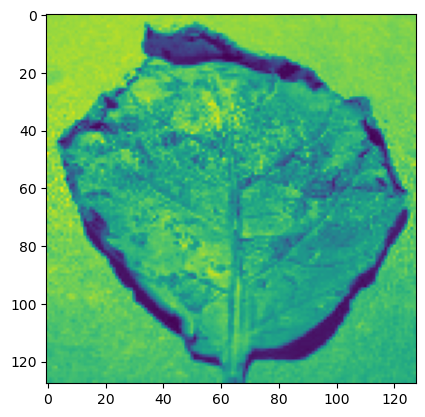

the predicted result is  ['DateSet/potato/Potato___Early_blight']
the acutal value is  DateSet/potato/Potato___Early_blight


In [16]:
import random 
n=random.randint(0,x_test.shape[0]-1)
img= x_test[n]
plt.imshow(img)
plt.show()
input_img = np.expand_dims(img, axis=0)
ferures =GLCM(input_img)
predected_img= model_knn.predict(ferures)
predicted= lb.inverse_transform([predected_img])
print("the predicted result is ", predicted)
print("the acutal value is ", y_test[n])